In [11]:
import pandas as pd
import matplotlib.pyplot as plt
## get the location for csv file 
Location = r'C:\Users\tomb3\Desktop\SF State\SF_State_Data_3.csv'
df = pd.read_csv(Location)





In [12]:
##create a numeric variable for the term
Quat = {"Fall": .8, "Spring":.4}
def term_to_num(x):
    term = x.split(' ')
    return Quat[term[0]]+int(term[1]) 
df['term_num'] = df['term'].apply(term_to_num)


In [13]:
##parse the course number
def course_to_num(x):
    try:
        return int(x.split(" ")[1].split('[')[0])
    except:
        return 0
df['class_number'] = df['class_number'].apply(course_to_num)
undergrad = df.query('class_number<700')
lower_div = undergrad.query('class_number<99' and 'class_number<299')
upper_div = undergrad.query('class_number<699'and 'class_number>299')
upper_div

,Unnamed: 0,term,class_number,num_people_enrolled,total_class_size,Prof Name,term_num
7,7,Fall 2005,305,42,75,Daniel Tomasevich,2005.8
8,8,Fall 2005,310,61,75,Yonggang Zhao,2005.8
9,9,Fall 2005,313,27,40,Chin Wong,2005.8
10,10,Fall 2005,313,25,40,Chin Wong,2005.8
11,11,Fall 2005,413,21,40,Barry Levine,2005.8
12,12,Fall 2005,413,35,40,Barry Levine,2005.8
13,13,Fall 2005,415,43,40,Andrew Swan,2005.8
14,14,Fall 2005,510,53,75,Robert Wall,2005.8
15,15,Fall 2005,520,47,40,Robert Wall,2005.8
16,16,Fall 2005,600,24,40,Jozo Dujmovic,2005.8


In [14]:
## location of course classifications and read in the data
Location = r'C:\Users\tomb3\Desktop\SF State\course_sort.csv'
CS = pd.read_csv(Location, index_col='class_number')

# creata a dict out of the data frame
CS = CS.transpose()
CS = CS.fillna(0)
class_data = CS.to_dict()
dt =[]

def get_key(dict_): 
    for key, value in dict_.items(): 
         if value==1: 
            return key 
## creats a new vairbale accorinng to the subject of a class
for cls in upper_div['class_number']:
    try:
        print(get_key(class_data[cls]))
        dt.append(get_key(class_data[cls]))
    except:
         dt.append("None")
upper_div['subject'] = dt

software_eng
software_eng
Founations 
Founations 
Founations 
Founations 
Founations 
Founations 
game_dev
Founations 
network_computin/IT
None
software_eng
network_computin/IT
None
None
None
None
None
None
software_eng
None
None
None
software_eng
Founations 
Founations 
Founations 
Founations 
Founations 
game_dev
network_computin/IT
network_computin/IT
Founations 
web_dev
software_eng
None
None
None
None
None
None
software_eng
None
None
None
software_eng
software_eng
Founations 
Founations 
Founations 
Founations 
Founations 
Founations 
game_dev
interdisciplinary
Founations 
network_computin/IT
None
web_dev
software_eng
network_computin/IT
None
None
None
None
None
software_eng
None
None
None
software_eng
software_eng
Founations 
Founations 
Founations 
Founations 
Founations 
Founations 
game_dev
network_computin/IT
network_computin/IT
Founations 
web_dev
software_eng
None
None
None
None
None
None
software_eng
None
None
None
software_eng
software_eng
Founations 
Founations 
Founatio

C:\Users\tomb3\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
counts = upper_div.groupby(['subject', 'term_num']).count()
means = upper_div.groupby(['subject','term_num']).mean()
totals = upper_div.groupby(['subject','term_num']).sum()

(array([2004., 2006., 2008., 2010., 2012., 2014., 2016., 2018., 2020.,
        2022.]), <a list of 10 Text xticklabel objects>)

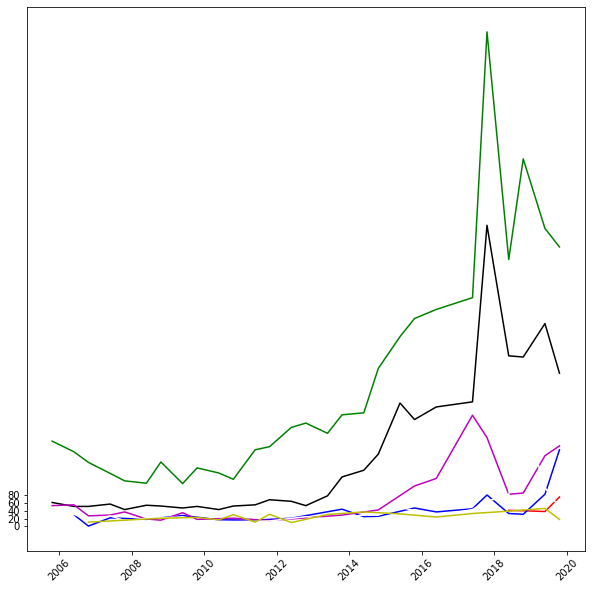

In [55]:
## basic line plot over time 
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(totals.loc['Founations ','num_people_enrolled'], alpha = 1, color = 'g')
ax1.plot(totals.loc['AI','num_people_enrolled'], alpha = 1, color = 'r')
ax1.plot(totals.loc['software_eng','num_people_enrolled'], alpha = 1, color = 'k')
ax1.plot(totals.loc['web_dev','num_people_enrolled'], alpha = 1, color = 'b')
ax1.plot(totals.loc['network_computin/IT','num_people_enrolled'], alpha = 1, color = 'm')
ax1.plot(totals.loc['game_dev','num_people_enrolled'], alpha = 1, color = 'w')
#ax1.plot(means.loc['data_science','num_people_enrolled'], alpha = 1, color = 'b')
ax1.plot(means.loc['interdisciplinary','num_people_enrolled'], alpha = 1, color = 'y')
ticks = ax1.set_yticks([0,20, 40, 60,80])
plt.xticks(rotation=45)

In [31]:
heat = pd.DataFrame(means['num_people_enrolled'])
heat = heat.unstack()

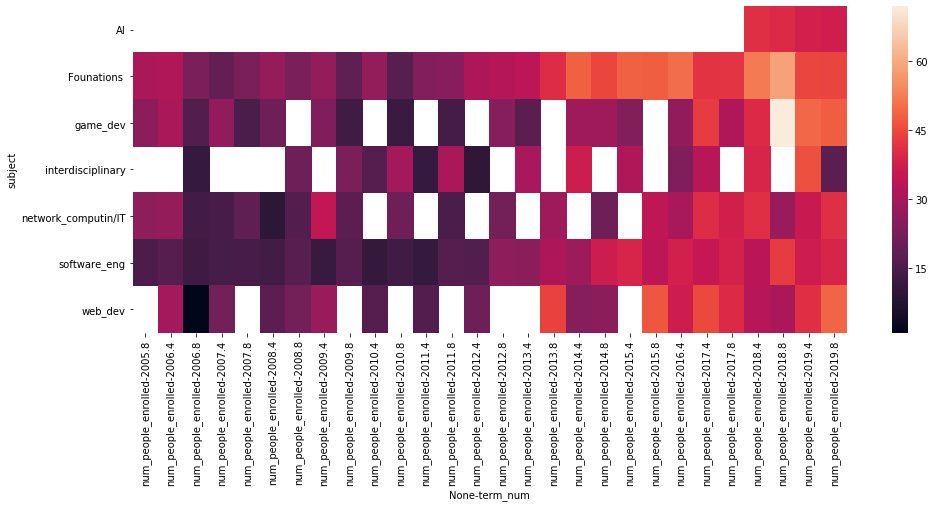

In [28]:
## heat chart of the means 
import seaborn as sns
heat = heat.drop('None')
plt.figure(figsize=(16, 6))
sns.heatmap(heat)

In [57]:
## bar chart 
bar_c = pd.DataFrame(totals['num_people_enrolled'])
bar_c = heat.unstack()
bar_c = pd.DataFrame(bar_c.loc['num_people_enrolled'])
bar_c = bar_c.unstack()
bar_c.index

Float64Index([2005.8, 2006.4, 2006.8, 2007.4, 2007.8, 2008.4, 2008.8, 2009.4,
              2009.8, 2010.4, 2010.8, 2011.4, 2011.8, 2012.4, 2012.8, 2013.4,
              2013.8, 2014.4, 2014.8, 2015.4, 2015.8, 2016.4, 2017.4, 2017.8,
              2018.4, 2018.8, 2019.4, 2019.8],
             dtype='float64', name='term_num')

In [ ]:
import plotly.graph_objects as go
#heat = heat.drop('None')

fig = go.Figure(data=[
    go.Bar(name='Founations', x=bar_c.index, y=bar_c.loc(axis=1)[:, 'Founations ']),
    go.Bar(name='AI', x=bar_c.index, y=bar_c.loc(axis=1)[:, 'AI']),
    go.Bar(name='software_eng', x=bar_c.index, y=bar_c.loc(axis=1)[:, 'software_eng']), 
] )
fig.update_layout(barmode='stack', autosize=True)
fig.show()